In [110]:
# CCS3342-Business Intelligence
# Mini Project

# Group members:
# 22UG2-0263 (Ashoka Chandrasiri)
# 22UG2-0087 (Dilakna Pitadeniya)
# 22UG2-0270 (Nimasha Udari)
# 22UG2-0076 (Praveen Minindu)

# Dataset Link: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset

In [112]:
# Import all the necessary libraries.

import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical plots
import joblib # Used to save and load machine learning models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [114]:
# Load The Dataset (heartattack prediction)

df = pd.read_csv("heartattack prediction.csv")
print("Dataset Loaded: !\n")
print(df.head())

Dataset Loaded: !

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [116]:
# Check Some Basic Details About The Data Set Before Preprocessing.

# Check Data Types.
print("\nData Types:")
print(df.dtypes)
print("")

# Print All The Column Names.
print(f"Columns: {df.columns}")
print("")

# Print Number Of Rows.
print(f"Number of Rows: {df.shape[0]}")


Data Types:
age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

Columns: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

Number of Rows: 1190


In [118]:
# Displays the Statistical Summary of the Dataset

print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359

In [120]:
# Check for Duplicate Values

print("\nDuplicate Values in Dataset:")
print (df.duplicated().sum())


Duplicate Values in Dataset:
272


In [122]:
# Check for Missing Values

print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [124]:
# Check for Noisy Data in Numarical Columns

noisy_data_counts = {}

for column in df.select_dtypes(include=['number']).columns:
    noisy_data_counts[column] = (df[column] < 0).sum()

print("Count of noisy data in each numerical column:")
for column, count in noisy_data_counts.items():
    print(f"{column}: {count}")

Count of noisy data in each numerical column:
age: 0
sex: 0
chest pain type: 0
resting bp s: 0
cholesterol: 0
fasting blood sugar: 0
resting ecg: 0
max heart rate: 0
exercise angina: 0
oldpeak: 13
ST slope: 0
target: 0


In [126]:
# Handling Noisy Data.
# Replace negative values in all numerical columns with the median.

for column in df.select_dtypes(include=['int64', 'float64']).columns:  
    df[column] = df[column].astype(float)
    df.loc[df[column] < 0, column] = df[column].median()

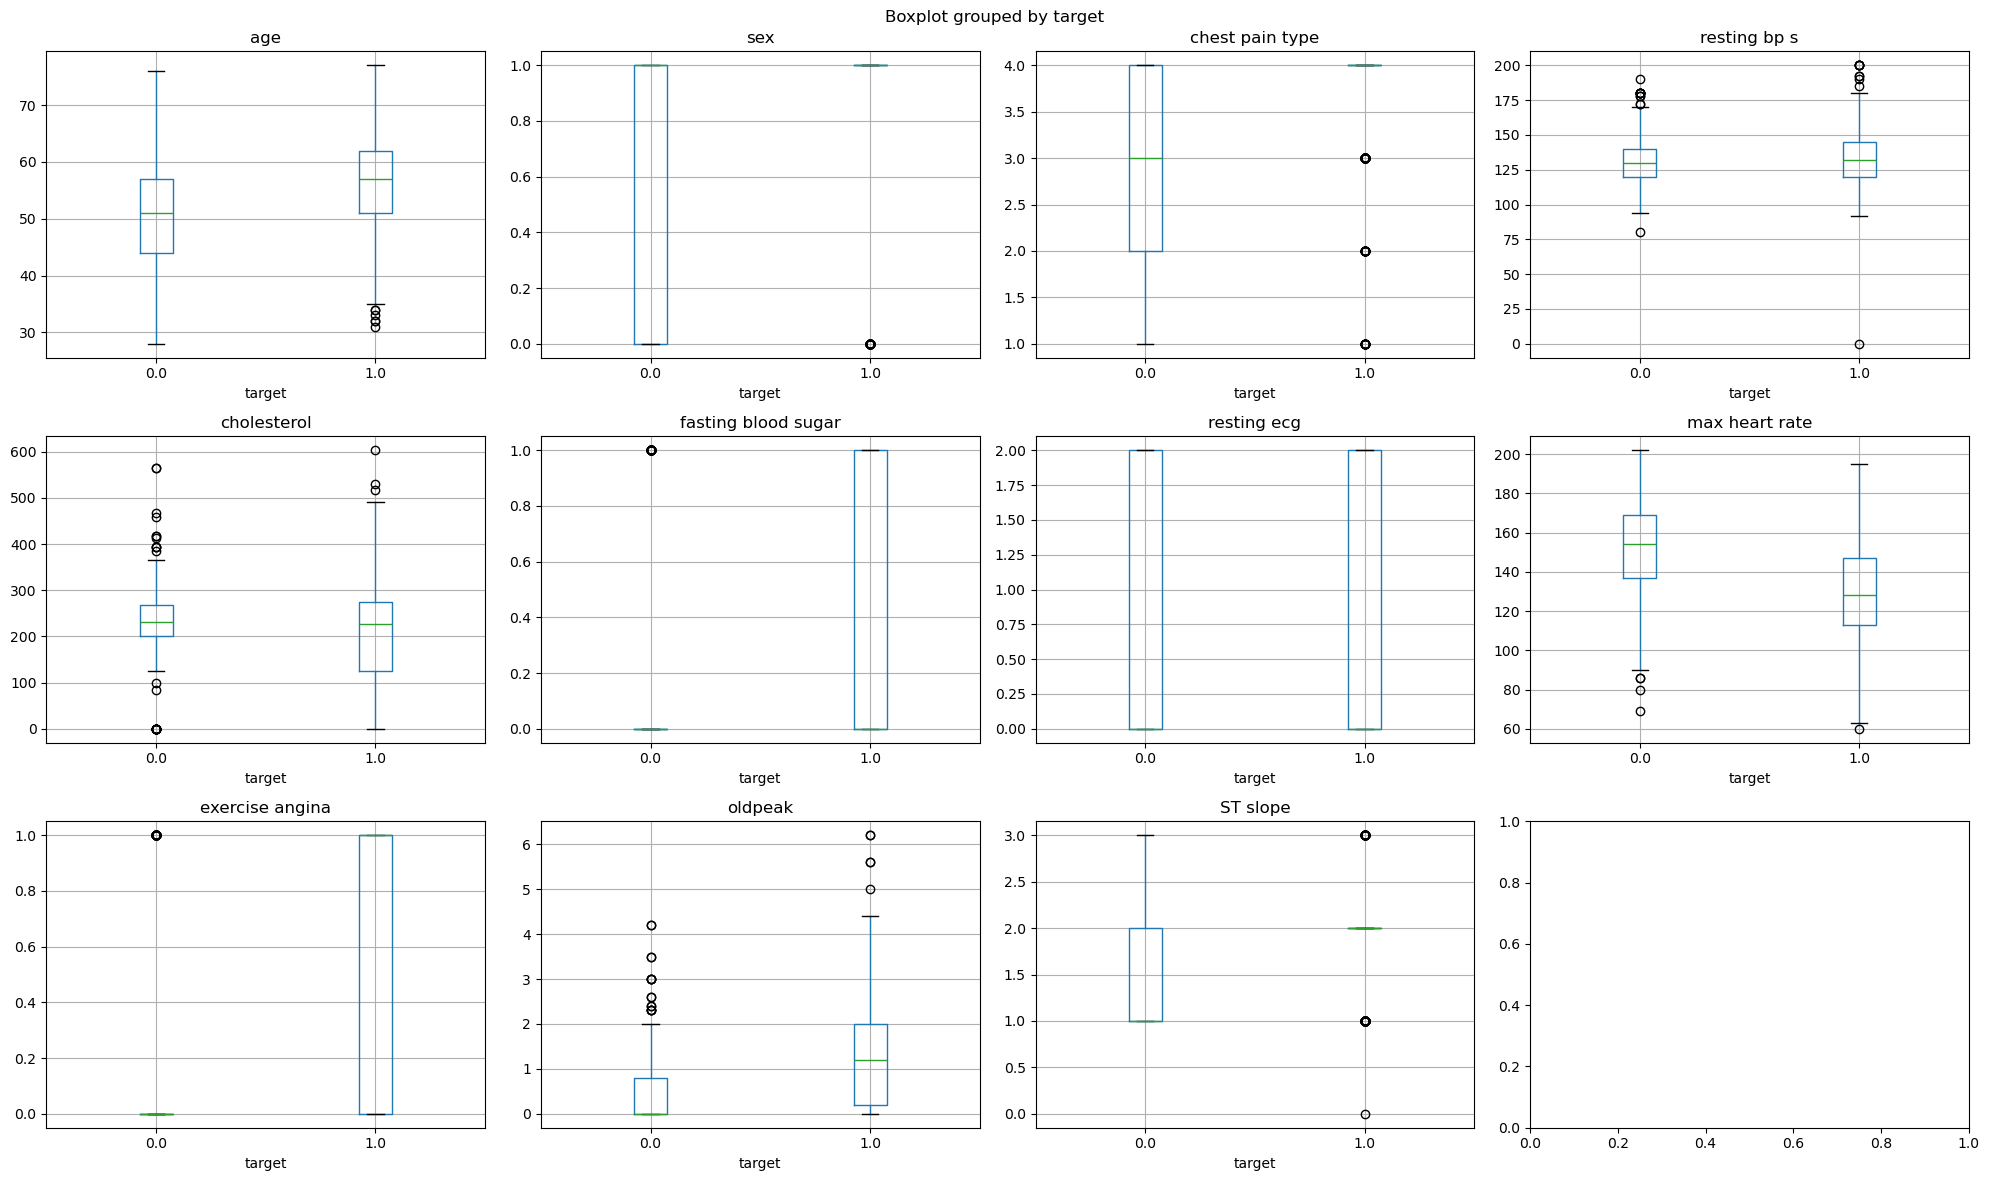

In [128]:
# Boxplots for each feature in the uploaded heart attack prediction dataset to visualize their distributions grouped by heart attack status.

%matplotlib inline

features = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 
            'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 
            'oldpeak', 'ST slope']

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle("Boxplots of Features by Heart Attack Status")

for ax, col in zip(axes.flatten(), features):
    df.boxplot(column=col, by='target', ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

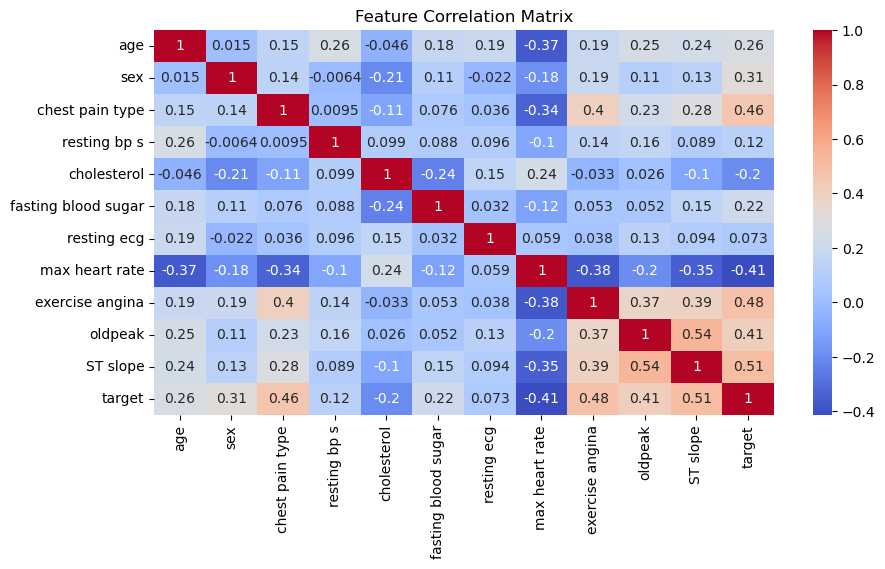

In [130]:
# Create a Feature Correlation Matrix to analys and get better understand of the relationships between features.

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

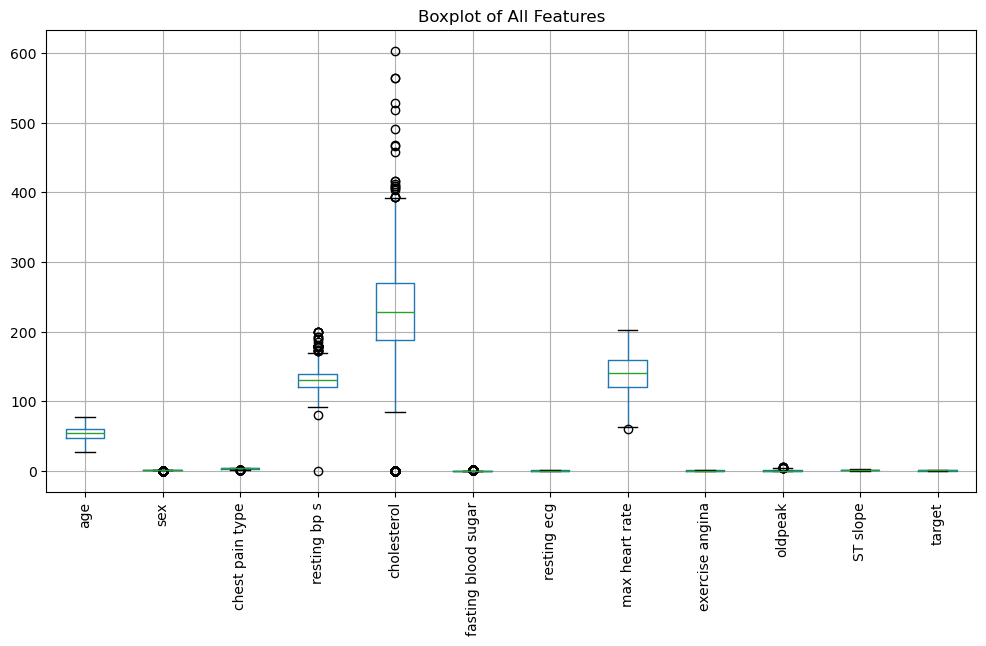

In [132]:
# Boxplot to check for outliers

plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of All Features")
plt.show()

In [134]:
# Model Training

In [136]:
# Select features and target variable for model training.

X = df.drop(columns=["target"])
y = df["target"]  # Target variable (1 = Heart disease, 0 = No heart disease)

In [138]:
# Scaling features for better performance.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
# Splitting Dataset into Train & Test Sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nData Split Completed!")

# Output the number of train and test samples.
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")


Data Split Completed!
Number of training samples: 952
Number of test samples: 238


In [142]:
# Model Training and Evaluation

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

print("\nMachine Learning Models Trained Successfully!")


Logistic Regression Model Performance:
Accuracy: 0.86
Confusion Matrix:
[[ 90  17]
 [ 16 115]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       107
         1.0       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238


Decision Tree Model Performance:
Accuracy: 0.89
Confusion Matrix:
[[100   7]
 [ 18 113]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       107
         1.0       0.94      0.86      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.90      0.89       238
weighted avg       0.90      0.89      0.90       238


Random Forest Model Performance:
Accuracy: 0.95
Confusion Matrix:
[[ 99   8]
 [  4 127]]
Classification Report:
 

In [144]:
# Since the most accurate model is the Random Forest model, we have chosen it for future use.
# Save the trained machine learning model as a pickle file.

filename = './heart_attack_prediction_model.pkl'
joblib.dump(models["Random Forest"], filename)

print("Model Saved!")

Model Saved!


In [ ]:
# Test The Model With Some User Inputs

def predict_heart_attack():
    
    # Collect user input
    age = int(input("Enter Age: "))
    sex = int(input("Enter Sex (1 = Male, 0 = Female): "))
    chest_pain = int(input("Enter Chest Pain Type (0-3): "))
    resting_bp = int(input("Enter Resting Blood Pressure: "))
    cholesterol = int(input("Enter Cholesterol Level: "))
    fasting_blood_sugar = int(input("Enter Fasting Blood Sugar (1 = Yes, 0 = No): "))
    resting_ecg = int(input("Enter Resting ECG Result (0-2): "))
    max_heart_rate = int(input("Enter Maximum Heart Rate: "))
    exercise_angina = int(input("Enter Exercise Induced Angina (1 = Yes, 0 = No): "))
    oldpeak = float(input("Enter Oldpeak (0-5): "))
    st_slope = int(input("Enter ST Slope (0-2): "))

    
    # Convert input to DataFrame with correct feature names
    feature_names = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
                     'fasting blood sugar', 'resting ecg', 'max heart rate',
                     'exercise angina', 'oldpeak', 'ST slope']
    
    new_data = pd.DataFrame([[age, sex, chest_pain, resting_bp, cholesterol, 
                              fasting_blood_sugar, resting_ecg, max_heart_rate, 
                              exercise_angina, oldpeak, st_slope]], columns=feature_names)

    
    # Scale input data using the same scaler used for training
    new_data_scaled = scaler.transform(new_data)

    
    # Predict using trained Logistic Regression model
    prediction = models["Random Forest"].predict(new_data_scaled)

    # Show result
    if prediction[0] == 1:
        print("\nHigh Risk of Heart Attack!")
    else:
        print("\nNo Immediate Risk of Heart Attack.")

predict_heart_attack()